<a href="https://colab.research.google.com/github/Gaurs86/ML-Assignments/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import os


#Generating Data

In [3]:
def get_y(x):
    return 10 + x*x

def sample_data(n=10000, scale=100):
    data = []
    x = scale * (np.random.random_sample((n,)) - 0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n]).astype(np.float32)


#Generator & Discriminator

In [4]:
# ----------------------------
# Generator
# ----------------------------
class Generator(nn.Module):
    def __init__(self, hsize=[16, 16], z_dim=2, out_dim=2):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, hsize[0]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[0], hsize[1]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[1], out_dim)
        )
    def forward(self, z):
        return self.net(z)

# ----------------------------
# Discriminator
# ----------------------------
class Discriminator(nn.Module):
    def __init__(self, hsize=[16, 16], in_dim=2):
        super(Discriminator, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(in_dim, hsize[0]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[0], hsize[1]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[1], 2)   # feature representation
        )
        self.out = nn.Linear(2, 1)  # final logit
    def forward(self, x):
        h = self.feature(x)
        out = self.out(h)
        return out, h

#Setup

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.RMSprop(G.parameters(), lr=0.001)
d_optimizer = optim.RMSprop(D.parameters(), lr=0.001)

#Training Loop

Iterations: 0	 Discriminator loss: 0.9216	 Generator loss: 0.5571


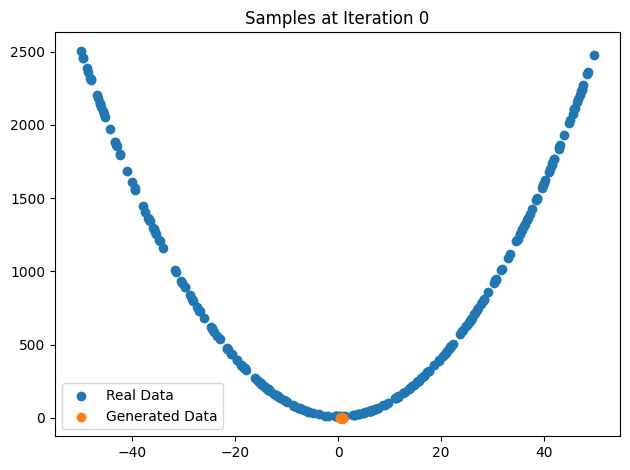

Iterations: 100	 Discriminator loss: 1.2494	 Generator loss: 0.7279
Iterations: 200	 Discriminator loss: 1.0714	 Generator loss: 0.4808
Iterations: 300	 Discriminator loss: 0.8509	 Generator loss: 0.8269
Iterations: 400	 Discriminator loss: 0.5333	 Generator loss: 1.7326
Iterations: 500	 Discriminator loss: 0.9098	 Generator loss: 0.9340
Iterations: 600	 Discriminator loss: 0.9946	 Generator loss: 1.5727
Iterations: 700	 Discriminator loss: 0.9837	 Generator loss: 1.1529
Iterations: 800	 Discriminator loss: 1.0793	 Generator loss: 0.6922
Iterations: 900	 Discriminator loss: 0.4249	 Generator loss: 4.9114
Iterations: 1000	 Discriminator loss: 1.0207	 Generator loss: 0.8647


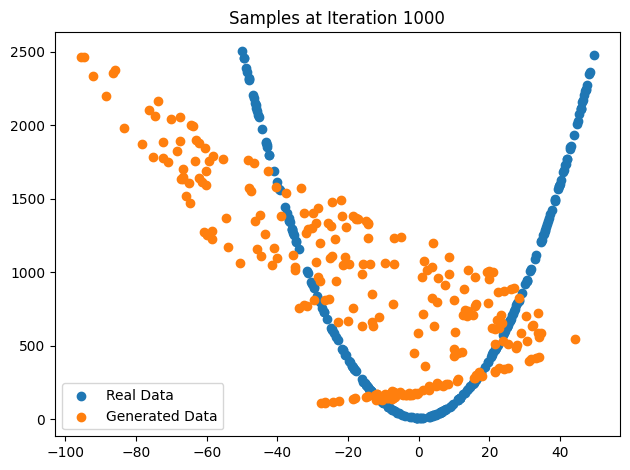

Iterations: 1100	 Discriminator loss: 1.1410	 Generator loss: 1.2007
Iterations: 1200	 Discriminator loss: 1.1893	 Generator loss: 1.4510
Iterations: 1300	 Discriminator loss: 1.1130	 Generator loss: 0.9354
Iterations: 1400	 Discriminator loss: 1.2262	 Generator loss: 0.8077
Iterations: 1500	 Discriminator loss: 1.2116	 Generator loss: 1.1807
Iterations: 1600	 Discriminator loss: 1.2830	 Generator loss: 0.6891
Iterations: 1700	 Discriminator loss: 1.3039	 Generator loss: 0.6550
Iterations: 1800	 Discriminator loss: 1.3084	 Generator loss: 0.6642
Iterations: 1900	 Discriminator loss: 1.3287	 Generator loss: 0.6166
Iterations: 2000	 Discriminator loss: 1.2731	 Generator loss: 0.8042


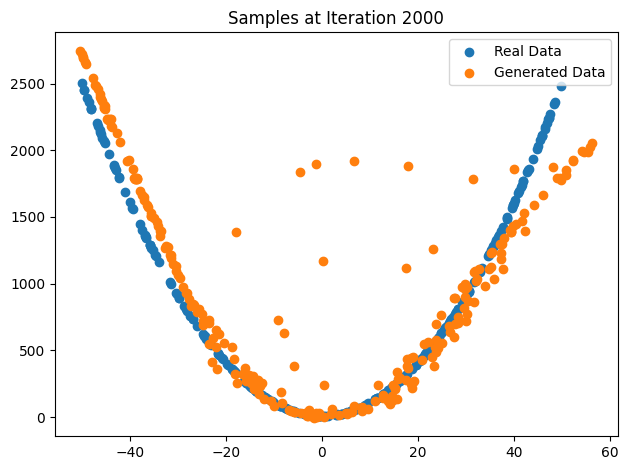

Iterations: 2100	 Discriminator loss: 1.2992	 Generator loss: 0.6662
Iterations: 2200	 Discriminator loss: 1.3764	 Generator loss: 0.8951
Iterations: 2300	 Discriminator loss: 1.3061	 Generator loss: 0.6068
Iterations: 2400	 Discriminator loss: 1.3270	 Generator loss: 0.6705
Iterations: 2500	 Discriminator loss: 1.3350	 Generator loss: 0.7190
Iterations: 2600	 Discriminator loss: 1.3171	 Generator loss: 0.7097
Iterations: 2700	 Discriminator loss: 1.3056	 Generator loss: 0.7031
Iterations: 2800	 Discriminator loss: 1.3009	 Generator loss: 0.6960
Iterations: 2900	 Discriminator loss: 1.2919	 Generator loss: 0.7233
Iterations: 3000	 Discriminator loss: 1.2710	 Generator loss: 0.7296


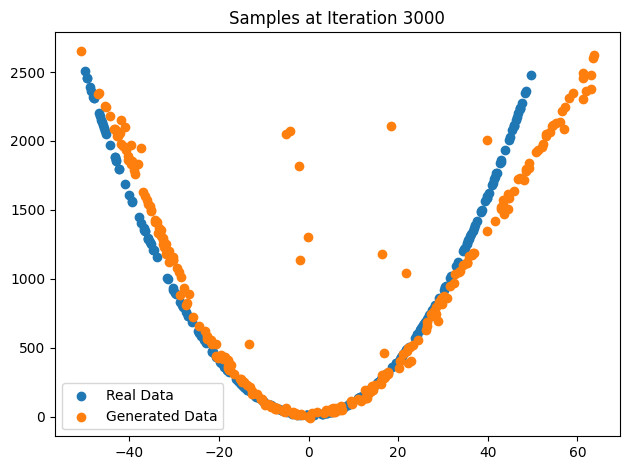

Iterations: 3100	 Discriminator loss: 1.2799	 Generator loss: 0.8627
Iterations: 3200	 Discriminator loss: 1.3048	 Generator loss: 0.7630
Iterations: 3300	 Discriminator loss: 1.2860	 Generator loss: 0.5998
Iterations: 3400	 Discriminator loss: 1.2245	 Generator loss: 0.5890
Iterations: 3500	 Discriminator loss: 1.2625	 Generator loss: 0.6661
Iterations: 3600	 Discriminator loss: 1.3295	 Generator loss: 0.7526
Iterations: 3700	 Discriminator loss: 1.3920	 Generator loss: 0.5839
Iterations: 3800	 Discriminator loss: 1.2017	 Generator loss: 0.6450
Iterations: 3900	 Discriminator loss: 1.3672	 Generator loss: 0.5325
Iterations: 4000	 Discriminator loss: 1.3762	 Generator loss: 0.5035


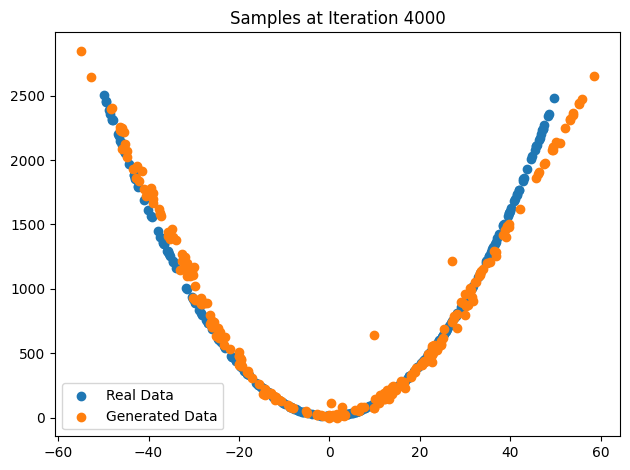

Iterations: 4100	 Discriminator loss: 1.2660	 Generator loss: 0.5660
Iterations: 4200	 Discriminator loss: 1.2952	 Generator loss: 0.5745
Iterations: 4300	 Discriminator loss: 1.3108	 Generator loss: 0.6322
Iterations: 4400	 Discriminator loss: 1.2107	 Generator loss: 0.5390
Iterations: 4500	 Discriminator loss: 1.3918	 Generator loss: 0.5795
Iterations: 4600	 Discriminator loss: 1.3717	 Generator loss: 0.6045
Iterations: 4700	 Discriminator loss: 1.3225	 Generator loss: 0.5026
Iterations: 4800	 Discriminator loss: 1.2919	 Generator loss: 0.6064
Iterations: 4900	 Discriminator loss: 1.2854	 Generator loss: 0.5708
Iterations: 5000	 Discriminator loss: 1.2581	 Generator loss: 0.6097


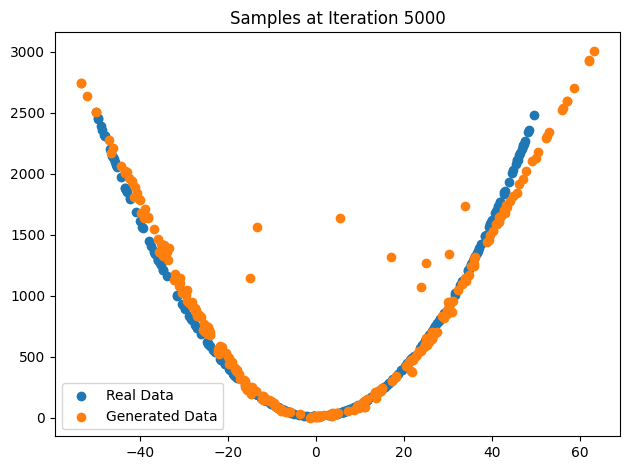

Iterations: 5100	 Discriminator loss: 1.3745	 Generator loss: 0.7066
Iterations: 5200	 Discriminator loss: 1.2036	 Generator loss: 0.6361
Iterations: 5300	 Discriminator loss: 1.2800	 Generator loss: 0.5647
Iterations: 5400	 Discriminator loss: 1.2599	 Generator loss: 0.5939
Iterations: 5500	 Discriminator loss: 1.3549	 Generator loss: 0.6370
Iterations: 5600	 Discriminator loss: 1.4062	 Generator loss: 0.4035
Iterations: 5700	 Discriminator loss: 1.1656	 Generator loss: 0.7084
Iterations: 5800	 Discriminator loss: 1.2664	 Generator loss: 0.6836
Iterations: 5900	 Discriminator loss: 1.3302	 Generator loss: 0.6681
Iterations: 6000	 Discriminator loss: 1.2891	 Generator loss: 0.6966


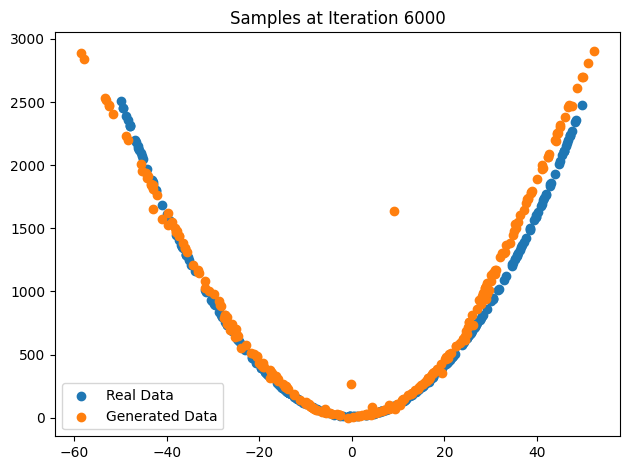

Iterations: 6100	 Discriminator loss: 1.2756	 Generator loss: 0.7053
Iterations: 6200	 Discriminator loss: 1.1493	 Generator loss: 0.6896
Iterations: 6300	 Discriminator loss: 1.2811	 Generator loss: 0.6278
Iterations: 6400	 Discriminator loss: 1.1718	 Generator loss: 0.5785
Iterations: 6500	 Discriminator loss: 1.2116	 Generator loss: 0.6601
Iterations: 6600	 Discriminator loss: 1.3099	 Generator loss: 0.6526
Iterations: 6700	 Discriminator loss: 1.1666	 Generator loss: 0.5336
Iterations: 6800	 Discriminator loss: 1.4584	 Generator loss: 0.6172
Iterations: 6900	 Discriminator loss: 1.5001	 Generator loss: 0.7253
Iterations: 7000	 Discriminator loss: 1.2613	 Generator loss: 0.8543


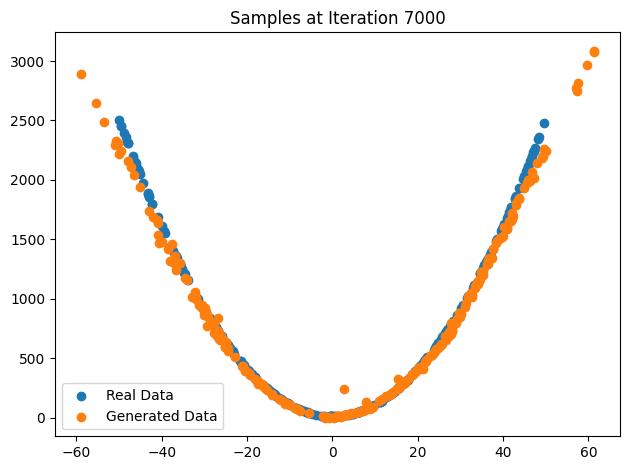

Iterations: 7100	 Discriminator loss: 1.3741	 Generator loss: 0.4416
Iterations: 7200	 Discriminator loss: 1.1659	 Generator loss: 0.7637
Iterations: 7300	 Discriminator loss: 1.3115	 Generator loss: 0.6144
Iterations: 7400	 Discriminator loss: 1.2921	 Generator loss: 0.8175
Iterations: 7500	 Discriminator loss: 1.2358	 Generator loss: 0.7523
Iterations: 7600	 Discriminator loss: 1.2254	 Generator loss: 0.7456
Iterations: 7700	 Discriminator loss: 1.2060	 Generator loss: 0.5818
Iterations: 7800	 Discriminator loss: 1.2799	 Generator loss: 0.7122
Iterations: 7900	 Discriminator loss: 1.3264	 Generator loss: 0.5092
Iterations: 8000	 Discriminator loss: 1.1874	 Generator loss: 0.6431


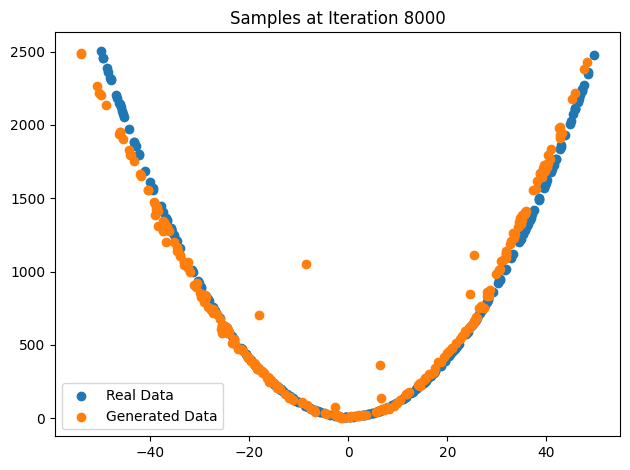

Iterations: 8100	 Discriminator loss: 1.2619	 Generator loss: 0.6207
Iterations: 8200	 Discriminator loss: 1.3000	 Generator loss: 0.7055
Iterations: 8300	 Discriminator loss: 1.2115	 Generator loss: 0.6229
Iterations: 8400	 Discriminator loss: 1.1117	 Generator loss: 0.5689
Iterations: 8500	 Discriminator loss: 1.2906	 Generator loss: 0.7160
Iterations: 8600	 Discriminator loss: 1.2946	 Generator loss: 0.8626
Iterations: 8700	 Discriminator loss: 1.0735	 Generator loss: 0.5614
Iterations: 8800	 Discriminator loss: 1.4980	 Generator loss: 0.6611
Iterations: 8900	 Discriminator loss: 1.2909	 Generator loss: 0.7949
Iterations: 9000	 Discriminator loss: 1.3691	 Generator loss: 0.8761


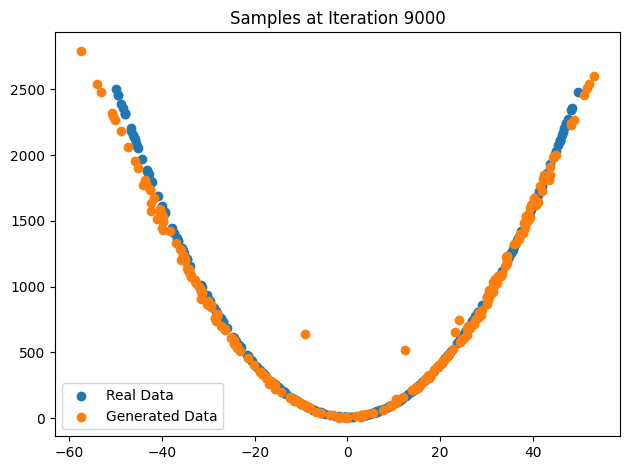

Iterations: 9100	 Discriminator loss: 1.2911	 Generator loss: 0.6888
Iterations: 9200	 Discriminator loss: 1.1173	 Generator loss: 0.5992
Iterations: 9300	 Discriminator loss: 1.1565	 Generator loss: 0.5659
Iterations: 9400	 Discriminator loss: 1.2973	 Generator loss: 0.6010
Iterations: 9500	 Discriminator loss: 1.3007	 Generator loss: 0.6719
Iterations: 9600	 Discriminator loss: 1.2461	 Generator loss: 0.5076
Iterations: 9700	 Discriminator loss: 1.3247	 Generator loss: 0.7542
Iterations: 9800	 Discriminator loss: 1.0711	 Generator loss: 0.6481
Iterations: 9900	 Discriminator loss: 1.1366	 Generator loss: 0.7075
Iterations: 10000	 Discriminator loss: 1.2582	 Generator loss: 0.6578


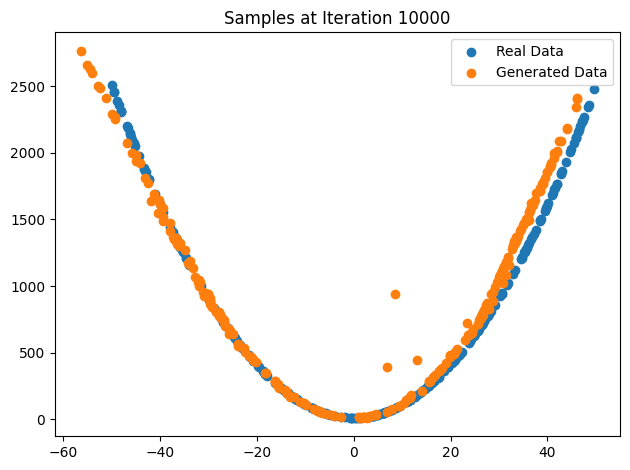

In [6]:
epochs = 10001
batch_size=256
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size).astype(np.float32)

# Store losses for plotting
d_losses = []
g_losses = []


for epoch in range(epochs):


    X_batch = sample_data(n=batch_size).astype(np.float32)
    Z_batch = sample_Z(batch_size, 2)

    X_batch = torch.tensor(X_batch, device=device)
    Z_batch = torch.tensor(Z_batch, device=device)


    # -----------------
    # Train Discriminator
    # -----------------
    for _ in range(nd_steps):
        d_optimizer.zero_grad()

        r_logits, r_rep = D(X_batch)
        f_logits, g_rep = D(G(Z_batch).detach())

        d_loss_real = criterion(r_logits, torch.ones_like(r_logits))
        d_loss_fake = criterion(f_logits, torch.zeros_like(f_logits))
        d_loss = d_loss_real + d_loss_fake

        d_loss.backward()
        d_optimizer.step()

    rrep_dstep, grep_dstep = r_rep.detach().cpu().numpy(), g_rep.detach().cpu().numpy()

    # -----------------
    # Train Generator
    # -----------------
    for _ in range(ng_steps):
        g_optimizer.zero_grad()
        fake = G(Z_batch)
        f_logits, g_rep = D(fake)
        g_loss = criterion(f_logits, torch.ones_like(f_logits))
        g_loss.backward()
        g_optimizer.step()

    rrep_gstep, grep_gstep = r_rep.detach().cpu().numpy(), g_rep.detach().cpu().numpy()

      # Save losses
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    # -----------------
    # Print progress
    # -----------------

    if epoch % 100 == 0:
        print(f"Iterations: {epoch}\t Discriminator loss: {d_loss.item():.4f}\t Generator loss: {g_loss.item():.4f}")

    # -------------------
    # Visualization
    # -------------------
    if epoch % 1000 == 0:
        with torch.no_grad():
            g_plot = G(Z_batch).cpu().numpy()

        plt.figure()
        xax = plt.scatter(x_plot[:, 0], x_plot[:, 1])
        gax = plt.scatter(g_plot[:, 0], g_plot[:, 1])
        plt.legend((xax, gax), ("Real Data", "Generated Data"))
        plt.title(f'Samples at Iteration {epoch}')
        plt.tight_layout()
        plt.show()


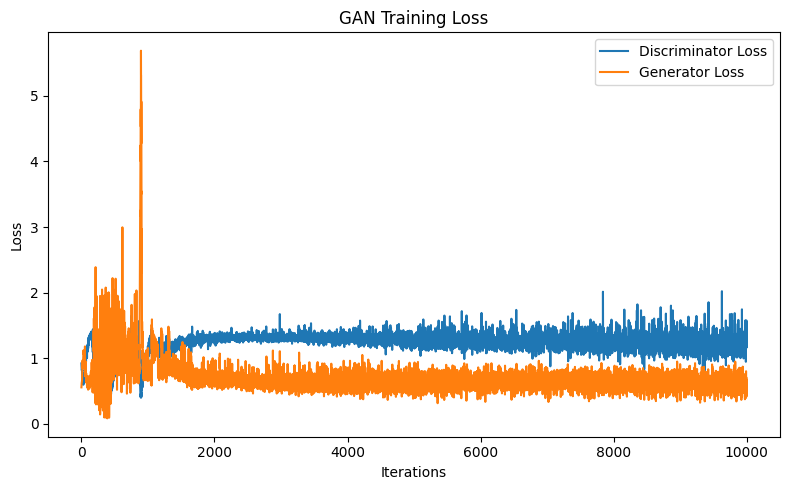

In [7]:
# Plot Discriminator and Generator Loss
plt.figure(figsize=(8,5))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("GAN Training Loss")
plt.legend()
plt.tight_layout()
plt.show()